In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.downloader.download('vader_lexicon')

In [ ]:
finviz_url = 'https://finviz.com/quote.ashx?t='
Companys = ['AMZN', 'GOOG', 'FB'] # stock companies

news_tables = {} # Declare empty dictionary to store results from finviz

for Company in Companys:
    url = finviz_url + Company
    req = Request(url=url, headers={'user-agent':'my-app'}) # Specify headers or else access will be denied
    response = urlopen(req)
    soup = BeautifulSoup(response,features='html.parser')
    news_table = soup.find(id='news-table')
    # We get table rows
    # We get text on on td tag
    # We get time stamp on tr tag
    news_tables.update({Company:news_table}) # Key ticker (Company name) and value news_table
    

parsed_data = [] # Instantiate new list object

for Company, news_table in news_tables.items(): # This will iterate over all keys and values using the .tems() function
    for row in news_table.find_all('tr'):
        Comments = row.a.text
        date_data = row.td.text.split(' ') # Split date with space 
        # If loop to determine if date is made of 1 or 2 indexes
        if len(date_data)==1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([Company,date,time,Comments])

    

# print(parsed_data) remember the parsed data is a list of lists

df = pd.DataFrame(parsed_data, columns=['Company','Date','Time','Comments'])
# Analyse your text
vader = SentimentIntensityAnalyzer()
# When we run polarity, we get a couple of key values from the result dictionary
# 'neg', 'neu', 'pos', 'compound'
# We can pull out what ever we want to analyse from this dictionary
# Create a function and get just the compound score
# Then use the apply function to run this function
function = lambda x: vader.polarity_scores(x)['compound']
# We want to loop through our comments column
df['Compound'] = df['Comments'].apply(function)
# Convert date column to date time
#df['Date'] = pd.to_datetime(df.Date).dt.date

The VADER algorithm outputs sentiment scores to 4 classes of sentiments
neg: Negative
neu: Neutral
pos: Positive
compound: Compound (i.e. aggregated score)

In [ ]:
print(df)

In [ ]:
# Get independent variables as X
X = df.iloc[: , :1].values
Y = df.iloc[: , -1].values
# print(Y)
# print(X)
# print(df)

In [ ]:
# Encoding the independent variables

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np 

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough') # Pass through will not encode the other columns. [3] represents index to encode
X = ct.fit_transform(X)
# X = np.array(ct.fit_transform(X))

print(X)

In [ ]:
# Transform y into a two D array since the transform function expects a two D array

Y = Y.reshape(len(Y),1)
print(Y)

In [ ]:
# Splitting data into Training and Test set
# We need to train data so as to avoid over fitting and under fitting
# We want the results of our Training and Test data to match
# random_state controls the shuffling applied to the data before applying the split
# test_size should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# Feature scaling should be applied after the split
# Standardisation and Normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# We do not feature scale dummy variables
X_train[:, 0:] = sc.fit_transform(X_train[:, 0:])   # Exclude dummy colums thus take from third index
X_test[:, 0:] = sc.transform(X_test[:, 0:]) # We need same scaler thus we apply the transform method
print(X_train)
print(X_test)

In [ ]:
# Trainig the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,max_error,explained_variance_score

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

LogisticRegression is not for regression but classification
The Y variable must be the classification class, for example 0 or 1
And not a continuous variable,

In [ ]:
# Testing 
pred = regressor.predict(X_test)
print(pred)

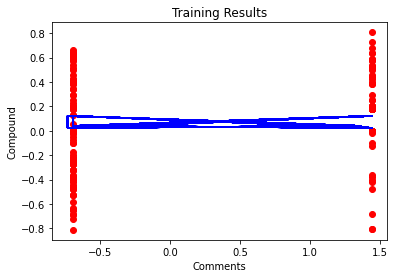

In [27]:
# Visualising training results

plt.scatter(X_train[:,0],Y_train, color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.title('Training Results')
plt.xlabel('Comments')
plt.ylabel('Compound')
plt.show() 

In [29]:
# Visualising test results

plt.scatter(Y_test[:,0],Y_test, color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.title('Test Results')
plt.xlabel('Comments')
plt.ylabel('Compound')
plt.show()

NameError: name 'x_test' is not defined

In [28]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
model.coef_ # The linear regression coefficient can be accessed in a form of class attribute with model.coef_
model.intercept_ # The y-intercept can be accessed in a form of class attribute with model.intercept_
model.score(X, Y) # How good was your model? You can evaluate your model performance in a form of R-squared, with model.score(X, y). X is the features, and y is the response variable used to fit the model.


0.02557271974674169